Create a sentiment classifier for reviews
Use the reviews from publicly available Internet Movie Databse IMDB dataset that consists of 50k reviews
Half are training & half are validation
Total 10 stars, below/equal to 4 = bad and above 7 is good

Compare between: 1.Dense, 2. SimpleRNN, 3. Bidirectional RNN, 4. Stacked, 5.LSTM, 6. GRU

In [57]:
import keras 
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, SpatialDropout1D, LSTM, GRU, SimpleRNN
from keras.layers.wrappers import Bidirectional
from keras.callbacks import ModelCheckpoint
import os
from sklearn.metrics import roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [35]:
#output directory
output_dir = 'model_output/rnn'

#training
epochs = 4
batch_size = 128

#embedding:
n_dim = 64
n_unique_words = 10000
n_words_to_skip = 50     # % of data to split for train & validation
max_review_length = 100
pad_type = trunc_type = 'pre'
drop_embed = 0.2

In [38]:
#Simple RNN
n_rnn = 256
drop_rnn = 0.2

#LSTM/Bi
n_lstm = 256
drop_lstm = 0.2

#stacked
n_lstm_1 = 64
n_lstm_2 = 64
drop2_lstm = 0.2

#GRU
n_gru = 256
drop_gru = 0.2

In [39]:
# The IMDB dataset is not readable , but with full of number values
# Here the split for train & test is done. top 50% assigned to train and the rest is to test

(x_train,y_train), (x_valid, y_valid) = imdb.load_data(num_words = n_unique_words)

x_train = pad_sequences(x_train, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)
x_valid = pad_sequences(x_valid, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)

In [40]:
# Simple RNN
model = Sequential()
model.add(Embedding(n_unique_words, n_dim, input_length = max_review_length)) # Embedding layer, create word vectors , size =n_unique_words,
                                                                            # dimension
model.add(SpatialDropout1D(drop_embed))  
model.add(SimpleRNN(n_rnn, dropout=drop_rnn))
model.add(Dense(1, activation = 'sigmoid')) # Output layer we need to have only one output , as to have either good or bad 
                                            #and we have to use sigmoid for the binary classification
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 64)           640000    
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 100, 64)          0         
 lDropout1D)                                                     
                                                                 
 simple_rnn (SimpleRNN)      (None, 256)               82176     
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 722,433
Trainable params: 722,433
Non-trainable params: 0
_________________________________________________________________


In [46]:
# LSTM
model = Sequential()
model.add(Embedding(n_unique_words, n_dim, input_length = max_review_length)) # Embedding layer, create word vectors , size =n_unique_words,
                                                                            # dimension
model.add(SpatialDropout1D(drop_embed))  
model.add(LSTM(n_lstm, dropout=drop_lstm))
model.add(Dense(1, activation = 'sigmoid')) # Output layer we need to have only one output , as to have either good or bad 
                                            #and we have to use sigmoid for the binary classification
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 100, 64)           640000    
                                                                 
 spatial_dropout1d_7 (Spatia  (None, 100, 64)          0         
 lDropout1D)                                                     
                                                                 
 lstm_4 (LSTM)               (None, 256)               328704    
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 968,961
Trainable params: 968,961
Non-trainable params: 0
_________________________________________________________________


In [42]:
# Bidirectional LSTM
model = Sequential()
model.add(Embedding(n_unique_words, n_dim, input_length = max_review_length)) # Embedding layer, create word vectors , size =n_unique_words,
                                                                            # dimension
model.add(SpatialDropout1D(drop_embed))  
model.add(Bidirectional(LSTM(n_lstm, dropout=drop_lstm)))
model.add(Dense(1, activation = 'sigmoid')) # Output layer we need to have only one output , as to have either good or bad 
                                            #and we have to use sigmoid for the binary classification
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 64)           640000    
                                                                 
 spatial_dropout1d_3 (Spatia  (None, 100, 64)          0         
 lDropout1D)                                                     
                                                                 
 bidirectional (Bidirectiona  (None, 512)              657408    
 l)                                                              
                                                                 
 dense_4 (Dense)             (None, 1)                 513       
                                                                 
Total params: 1,297,921
Trainable params: 1,297,921
Non-trainable params: 0
_________________________________________________________________


In [43]:
# GRU
model = Sequential()
model.add(Embedding(n_unique_words, n_dim, input_length = max_review_length)) # Embedding layer, create word vectors , size =n_unique_words,
                                                                            # dimension
model.add(SpatialDropout1D(drop_embed))  
model.add(GRU(n_gru, dropout=drop_gru))
model.add(Dense(1, activation = 'sigmoid')) # Output layer we need to have only one output , as to have either good or bad 
                                            #and we have to use sigmoid for the binary classification
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 64)           640000    
                                                                 
 spatial_dropout1d_4 (Spatia  (None, 100, 64)          0         
 lDropout1D)                                                     
                                                                 
 gru (GRU)                   (None, 256)               247296    
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 887,553
Trainable params: 887,553
Non-trainable params: 0
_________________________________________________________________


In [45]:
# Stacked
model = Sequential()
model.add(Embedding(n_unique_words, n_dim, input_length = max_review_length)) # Embedding layer, create word vectors , size =n_unique_words,
                                                                            # dimension
model.add(SpatialDropout1D(drop_embed))  
model.add(Bidirectional(LSTM(n_lstm_1, dropout=drop_lstm, return_sequences=True))) #Since stacked, we have a return sequence true
model.add(Bidirectional(LSTM(n_lstm_2, dropout=drop_lstm)))
model.add(Dense(1, activation = 'sigmoid')) # Output layer we need to have only one output , as to have either good or bad 
                                            #and we have to use sigmoid for the binary classification
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 100, 64)           640000    
                                                                 
 spatial_dropout1d_6 (Spatia  (None, 100, 64)          0         
 lDropout1D)                                                     
                                                                 
 bidirectional_1 (Bidirectio  (None, 100, 128)         66048     
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 1)                 129       
                                                      

Here you can see the number values based on the frequency of words occured
0 : Padding
1 : Starting Token - starting of review data
2 : Tokens that occur very frequently across the corpus(top 50)
3 : Most frequently occuring word in the corpus
4 : The second-most frequently occuring word
5 : The third-most frequently occuring word and so on.

In [47]:
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy']) # binary we used to classify o & 1
modelcheckpoint = ModelCheckpoint(filepath = output_dir+"/weights.{epoch:02d}.hdf5")
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [48]:
#train
model.fit(x_train, y_train,
         batch_size = batch_size, epochs=epochs, verbose=1,
         validation_data=(x_valid,y_valid),
         callbacks=[modelcheckpoint])

Epoch 1/4
196/196 [==============================] - 132s 663ms/step - loss: 0.5596 - accuracy: 0.6933 - val_loss: 0.3567 - val_accuracy: 0.8444
Epoch 2/4
196/196 [==============================] - 133s 678ms/step - loss: 0.3037 - accuracy: 0.8726 - val_loss: 0.3526 - val_accuracy: 0.8498
Epoch 3/4
196/196 [==============================] - 125s 640ms/step - loss: 0.2405 - accuracy: 0.9051 - val_loss: 0.3535 - val_accuracy: 0.8485
Epoch 4/4
196/196 [==============================] - 125s 639ms/step - loss: 0.1990 - accuracy: 0.9242 - val_loss: 0.4028 - val_accuracy: 0.8454


In [52]:
import numpy as np
#evaluate
model.load_weights(output_dir+"/weights.02.hdf5") #NOT zero-indexed
#y_hat = model.predict(x_valid)
#predict_proba=model.predict([x_valid])
#y_hat=np.argmax(predict_proba,axis=1)

predict_x=model.predict(x_valid)
y_hat=np.argmax(predict_x,axis=1)

In [53]:
y_valid[0]

0

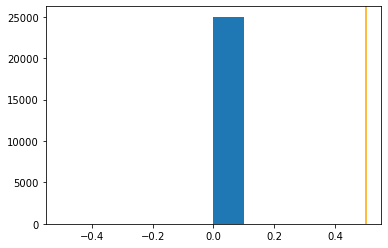

In [55]:
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')

In [56]:
pct_auc = roc_auc_score(y_valid, y_hat)*100.0
"{:0.2f}".format(pct_auc)

'50.00'

In [29]:
float_y_hat = []
for y in y_hat:
    float_y_hat.append(y[0])

IndexError: invalid index to scalar variable.

In [ ]:
' '.join(index_word[id] for id in all_x_valid[0])